### 모폴로지 (morphology)
모폴로지는 원래 생물학자들이 동물이나 식물이 보여주는 모양을 지칭하기 위해 사용하는 용어이다.  
컴퓨터 비전에서는 생물과 구분하기 위해 수학적 모폴로지(mathermatical morphology)라는 용어를 사용하기도 한다.  
물론 간단하게 모폴로지, 영상 모폴로지라고 부르는 경우가 더 많다.  
모폴로지는 이진 영상에서 작동하는 이진 모폴로지, 명암 영상에서 작동하는 명암 모폴로지로 나뉜다.

### 이진 모폴로지
모폴로지는 구조요소(Structurgin element)를 사용해 이진 영상에 있는 연결요소의 모양을 조작한다.  
다음의 그림은 몇 가지 대표적인 구조요소이다.
![](./data/morphology_fig1.jpg)  
모폴로지에서 구조요소는 집합으로 표현하는데, 값이 1인 요소만 집합에 속한다. 최우측에 있는 구조요소처럼 비대칭일수도있다.

집합 S를 t=(t_y,t_x) 만큼 이동시켜 얻은 새로운 집합을 S_t라고 표기하고 다음과 같은 식으로 정의한다.

$$
S_{t}= \left\{ s + t \mid s \in S \right\}
$$

가장 기본적인 두 가지 모폴로지 연산은 팽창(dilation)과 침식(erosion)이다.  
팽창은 f의 1인 화소에 구조요소 S를 씌우고 S의 1인 점과 겹치는 곳을 모두 1로 바꾼다(합집합).  
결과적으로 영상에 있는 연결요소는 구조요소만큼 외부로 팽창한다.  
반대로 침식은 f의 어떤 화소에 구조요소를 씌웠을 때, 구조요소의 1인 곳과 겹치는 곳이 모두 1인 경우만 그 화소를 1로 결정한다(교집합).  
식으로 표현하면 다음과 같다.

$$
Dilation : f \oplus S = \underset{x \in f}{\cup} S_{x}
$$

$$
Erosion : f \circleddash S = \left\{ x \mid x+s \in f, \forall s \in S \right\}
$$

여기서 f는 1을 갖는 화소의 집합이다. x in f는 영상 f에서 1을 갖는 화소 x를 의미한 다. s와 x는 좌표이다. 
팽창과 침식 연산을 이용해 열기(opening)과 닫기(closing) 연산을 다음과 같이 정의한다.

$$
Open : f \circ S = (f \circleddash S)\oplus S
$$

$$
Close : f \cdot S = (f \oplus S)\circleddash S
$$

열기는 침식이후 팽창, 닫기는 팽창이후 침식이다.  

ex)
![](./data/morphology_fig2.jpg)
![](./data/morphology_fig3.jpg)
x=(1,1) 일 때, s_{x} 혹은 x+s의 집합={(0,-1),(1,1),(1,2)} 이다. s_{x}의 합집합은 1이기 때문에 팽창연산에서는 1, x+s의 모든 요소가 f에서 1을 갖는 요소가 아니므로 0이 된다.  
팽창연산은 이와같이 홈을 메우는데 사용되는 것을 알 수 있다. 홈을 메우되 원래 크기를 유지하고 싶을 때 침식을 추가로 적용한 닫기 연산을 하면 된다.  
침식은 구조요소보다 작은 크기의 돌출 부분을 깎는다. 마찬가지로 침식된 영상에서 원래 크기로 복원하기 위해 팽창을 추가한 열기 연산을 한다.

### 명암 모폴로지
이진 모폴로지는 평면 모양의 패인 곳을 메우거나 튀어나온 곳을 깎는 역할을 한다면, 명암 모폴로지는 명암을 지표면부터의 높이로 간주하여 이 지형의 골짜기를 메우거나 봉우리를 깎는 효과를 제공한다.
$$
명암 팽창(평편하지 않은 구조요소) : (f \oplus S)(i,j) = \underset{(y,x) \in S}{max}(f(j-y,i-x) + S(y,x)) \\
명암 침식(평편하지 않은 구조요소) : (f \circleddash S)(i,j) = \underset{(y,x) \in S}{max}(f(j+y,i+x) - S(y,x))
$$

팽창은 지형을 솟구치게 하기 위해, 영상에 구조요소 값을 더해준 후 최대값을 취한다. 이때 구조요소의 좌표 (y,x)를 빼주는데 구조요소를 180도 회전해 적용하는 셈이다.  
예를들어 구조요소가 {(0,-1),(0,0),(0,1),(0,2)}인 오른쪽으로 팽창을 해야하는데 덧셋을 하게 되면 오른쪽 값을 참조해서 오른쪽으로 팽창을 하지 못한다.  
따라서 왼쪽의 값을 참조하기 위해 뺄셈을 한다.  
영상의 경계에서 구조요소를 씌우면 구조요소의 일부가 영상 밖으로 걸치게 되는데, 이런 경우를 처리하기 위해 팽창에서는 -무한대, 침식에서는 +무한대로 대체한다.  

실제 응용에서는 적합한 구조요소를 설계하는 일 자체가 번거롭기 때문에 보통 S를 제거해 다음과 같은 식을 사용한다.

$$
명암 팽창(평편하지 않은 구조요소) : (f \oplus S)(i,j) = \underset{(y,x) \in S}{max}f(j-y,i-x) \\
명암 침식(평편하지 않은 구조요소) : (f \circleddash S)(i,j) = \underset{(y,x) \in S}{max}f(j+y,i+x)
$$

이진 모폴로지와 마찬가지로 팽찬은 영상을 더 밝게 만들거나 밝은 영역을 넓혀주며, 침식은 영상을 더 어둡게 만들거나 어두운 영역을 넓혀준다.

모폴로지 연산은 공장에서 생산되는 기계 부품, 반도체 칩, LED 소자의 결함 탐지와 같은 응용 문제를 해결하는데 사용되기도 한다. 

### 코드

우선 영상을 이진화 한다.

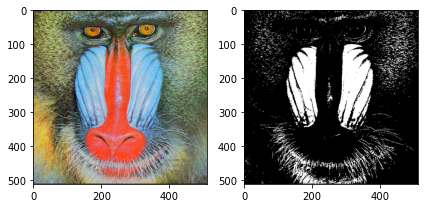

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img =cv2.cvtColor(cv2.imread('./data/baboon.jpg'),cv2.COLOR_BGR2RGB)
_,binary_im = cv2.threshold(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),175,255,cv2.THRESH_BINARY)

fig =plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(binary_im,cmap='gray')
fig.tight_layout()
plt.show()

이진화에서는 convolution 연산보다 1이 나타난 index를 한꺼번에 더해주는 게 더 빠르기 때문에 다음과 같이 구현했다. 침식과 팽창은 범위를 반대로 했다.

In [2]:
def bi_dilation(img,kernel,ker_center=None):
    ker_H, ker_W = kernel.shape
    if ker_center == None:
        ker_center = np.array([ker_H//2,ker_W//2])

    out = np.zeros_like(img)
    img//=np.max(img)
    for y in range(ker_H):
        for x in range(ker_W):
            if kernel[y,x]:
                y_diff = y-ker_center[0]
                x_diff = x-ker_center[1]
                h_pad = abs(y_diff)
                w_pad = abs(x_diff)
                if y_diff >0 and x_diff >0:
                    out+=np.pad(img[:-1*y_diff,:-1*x_diff],((h_pad,0),(w_pad,0)),'constant',constant_values=0)
                elif y_diff >0:
                    out += np.pad(img[:-1*y_diff,-1*x_diff:], ((h_pad,0), (0, w_pad)), 'constant', constant_values=0)
                elif x_diff >0:
                    out += np.pad(img[-1*y_diff:, :-1*x_diff], ((0,h_pad), (w_pad,0)), 'constant', constant_values=0)
                else:
                    out += np.pad(img[-1*y_diff:, -1*x_diff:], ((0, h_pad), (0,w_pad)), 'constant', constant_values=0)

    return np.uint8(out>0)*255

def bi_erosion(img,kernel,ker_center=None):
    ker_H, ker_W = kernel.shape
    if ker_center == None:
        ker_center = np.array([ker_H//2,ker_W//2])

    out = np.zeros_like(img)
    ker_sum = np.sum(kernel)
    img//=np.max(img)
    for y in range(ker_H):
        for x in range(ker_W):
            if kernel[y,x]:
                y_diff = ker_center[0]-y
                x_diff = ker_center[1]-x
                h_pad = abs(y_diff)
                w_pad = abs(x_diff)
                if y_diff >0 and x_diff >0:
                    out+=np.pad(img[:-1*y_diff,:-1*x_diff],((h_pad,0),(w_pad,0)),'constant',constant_values=0)
                elif y_diff >0:
                    out += np.pad(img[:-1*y_diff,-1*x_diff:], ((h_pad,0), (0, w_pad)), 'constant', constant_values=0)
                elif x_diff >0:
                    out += np.pad(img[-1*y_diff:, :-1*x_diff], ((0,h_pad), (w_pad,0)), 'constant', constant_values=0)
                else:
                    out += np.pad(img[-1*y_diff:, -1*x_diff:], ((0, h_pad), (0,w_pad)), 'constant', constant_values=0)

    return np.uint8(out==ker_sum)*255

구조 요소를 다음과 같이 2개를 선언하고 팽창과 침식한 결과는 다음같다.

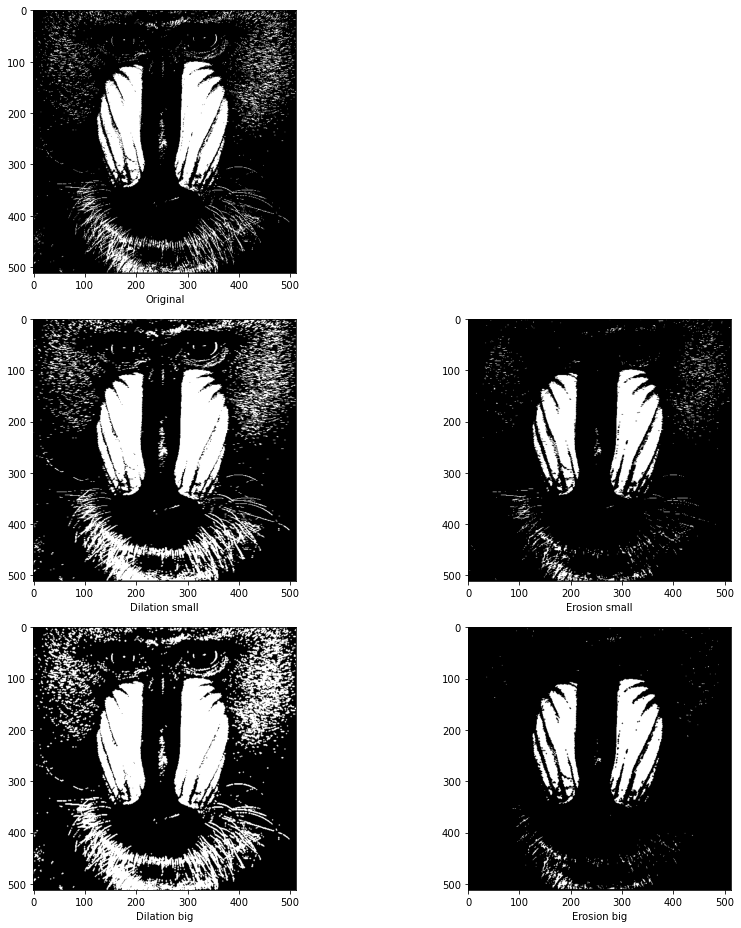

In [3]:
struct_small=np.array([[1,1,1]])

struct_big = np.array([[0,1,0],
                   [1,1,1],
                   [0,1,0]])

fig =plt.figure(figsize=(13,13))
plt.subplot(321)
plt.imshow(binary_im,cmap='gray')
plt.xlabel('Original')


plt.subplot(323)
plt.imshow(bi_dilation(binary_im,struct_small),cmap='gray')
plt.xlabel('Dilation small')

plt.subplot(324)
plt.imshow(bi_erosion(binary_im,struct_small),cmap='gray')
plt.xlabel('Erosion small')

plt.subplot(325)
plt.imshow(bi_dilation(binary_im,struct_big),cmap='gray')
plt.xlabel('Dilation big')

plt.subplot(326)
plt.imshow(bi_erosion(binary_im,struct_big),cmap='gray')
plt.xlabel('Erosion big')

fig.tight_layout()
plt.show()

구조요소의 영역에 따라 팽창,침식하는 범위가 바뀌는 것을 확인할 수 있다.

위에서 설명한 바와 같이 일반적으로 명암 모폴로지에서는 kernel의 요소가 0이 되도록 지정한다.  
적용한 영상을 보면 다음과 같이 팽창에서는 밝은영역이 커지고 침식에서는 어두운 영역이 늘어난다.
패딩과 영역을 지정하는게 팽창과 침식에서 달라진다. -무한대는 0, 무한대는 255로 설정했다.

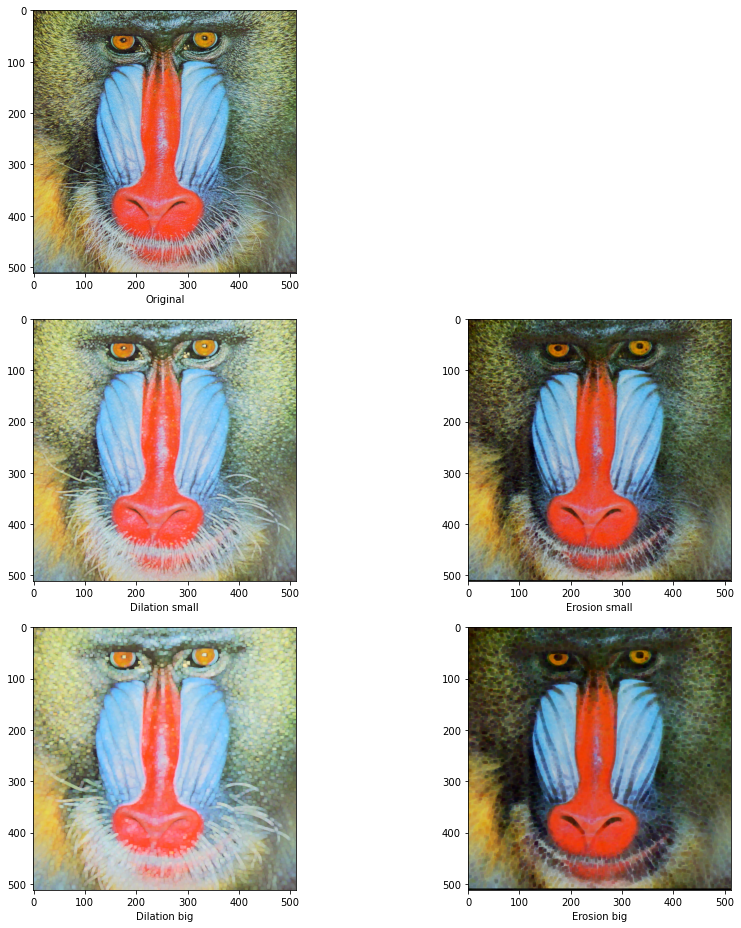

In [4]:
def dilation(img,kernel,ker_center=None):
    ker_H, ker_W = kernel.shape
    H,W,C = img.shape
    if ker_center == None:
        ker_center = np.array([ker_H//2,ker_W//2])
    out = np.zeros([H,W,C,ker_W*ker_H])
    count = 0
    for y in range(ker_H):
        for x in range(ker_W):
            y_diff = y-ker_center[0]
            x_diff = x-ker_center[1]
            h_pad = abs(y_diff)
            w_pad = abs(x_diff)
            if y_diff >0 and x_diff >0:
                out[...,count] = np.pad(img[:-1*y_diff,:-1*x_diff],((h_pad,0),(w_pad,0),(0,0)),'constant',constant_values=0)
            elif y_diff >0:
                out[...,count] = np.pad(img[:-1*y_diff,-1*x_diff:], ((h_pad,0), (0, w_pad),(0,0)), 'constant', constant_values=0)
            elif x_diff >0:
                out[...,count] = np.pad(img[-1*y_diff:, :-1*x_diff], ((0,h_pad), (w_pad,0),(0,0)), 'constant', constant_values=0)
            else:
                out[...,count] = np.pad(img[-1*y_diff:, -1*x_diff:], ((0, h_pad), (0,w_pad),(0,0)), 'constant', constant_values=0)
            count+=1

    return np.uint8(np.max(out,-1))

def erosion(img,kernel,ker_center=None):
    ker_H, ker_W = kernel.shape
    H,W,C = img.shape
    if ker_center == None:
        ker_center = np.array([ker_H//2,ker_W//2])
    out = np.zeros([H,W,C,ker_W*ker_H])
    count = 0

    for y in range(ker_H):
        for x in range(ker_W):
            y_diff = ker_center[0]-y
            x_diff = ker_center[1]-x
            h_pad = abs(y_diff)
            w_pad = abs(x_diff)
            if y_diff >0 and x_diff >0:
                out[...,count] = np.pad(img[:-1*y_diff,:-1*x_diff],((h_pad,0),(w_pad,0),(0,0)),'constant',constant_values=255)
            elif y_diff >0:
                out[...,count] = np.pad(img[:-1*y_diff,-1*x_diff:], ((h_pad,0), (0, w_pad),(0,0)), 'constant', constant_values=255)
            elif x_diff >0:
                out[...,count] = np.pad(img[-1*y_diff:, :-1*x_diff], ((0,h_pad), (w_pad,0),(0,0)), 'constant', constant_values=255)
            else:
                out[...,count] = np.pad(img[-1*y_diff:, -1*x_diff:], ((0, h_pad), (0,w_pad),(0,0)), 'constant', constant_values=255)
            count+=1

    return np.uint8(np.min(out,-1))

ker_small = np.zeros([3,3])
ker_big = np.zeros([5,5])

fig =plt.figure(figsize=(13,13))
plt.subplot(321)
plt.imshow(img)
plt.xlabel('Original')


plt.subplot(323)
plt.imshow(dilation(img,ker_small))
plt.xlabel('Dilation small')

plt.subplot(324)
plt.imshow(erosion(img,ker_small))
plt.xlabel('Erosion small')

plt.subplot(325)
plt.imshow(dilation(img,ker_big))
plt.xlabel('Dilation big')

plt.subplot(326)
plt.imshow(erosion(img,ker_big))
plt.xlabel('Erosion big')

fig.tight_layout()
plt.show()

### opencv
opencv에서는 커널의 값이 0이 아니면 연산을 하는것으로 취급한다.위의 명암 모폴로지 함수에서 이진 모폴로지 처럼 if kernel[y,x]:가 추가되었다고 생각하면 된다.

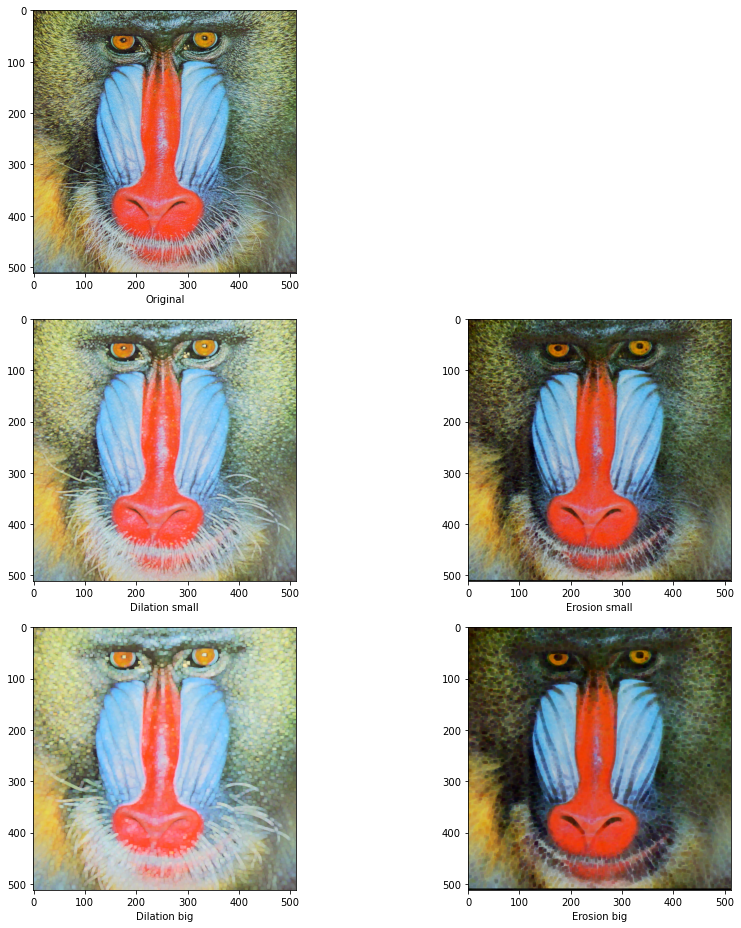

In [5]:
ker_small = np.ones([3,3])
ker_big = np.ones([5,5])

fig =plt.figure(figsize=(13,13))
plt.subplot(321)
plt.imshow(img)
plt.xlabel('Original')

plt.subplot(323)
plt.imshow(cv2.dilate(img,ker_small))
plt.xlabel('Dilation small')

plt.subplot(324)
plt.imshow(cv2.erode(img,ker_small))
plt.xlabel('Erosion small')

plt.subplot(325)
plt.imshow(cv2.dilate(img,ker_big))
plt.xlabel('Dilation big')
plt.subplot(326)
plt.imshow(cv2.erode(img,ker_big))
plt.xlabel('Erosion big')

fig.tight_layout()
plt.show()